In [49]:
import pandas as pd
from matplotlib import pyplot as plt

In [50]:
df = pd.read_csv("/content/covid.csv",sep=';')
df.head()

,Paciente,Hospital,Idade,Sexo,TDP,PAR,CS,ASJ,ECG,FCM,AIE,DST,IST,NVP,Talassemia,Diagnostico
0,262,C,60,1,1,150,240,0,0,171,0,0.9,1,0,3,0
1,520,H,54,2,4,125,224,0,0,122,0,2.0,2,-1,0,1
2,264,C,61,2,4,138,166,0,2,125,1,3.6,2,1,3,1
3,674,S,60,2,3,115,0,0,0,143,0,2.4,1,-1,0,1
4,102,C,57,1,4,128,303,0,2,159,0,0.0,1,1,3,0


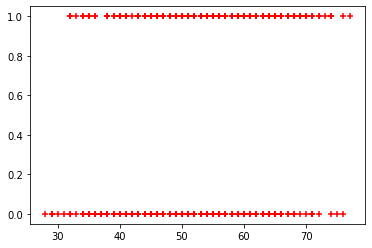

In [51]:
plt.scatter(df.Idade,df.Diagnostico,marker='+',color='red')

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df[['Idade','Sexo','TDP','PAR','CS','ASJ','ECG','FCM','AIE','DST','IST','NVP','Talassemia']],df.Diagnostico,train_size=0.9)

In [54]:
X_test

,Idade,Sexo,TDP,PAR,CS,ASJ,ECG,FCM,AIE,DST,IST,NVP,Talassemia
541,39,1,3,138,220,0,0,152,0,0.0,2,0,3
375,59,2,4,110,0,0,0,94,0,0.0,0,-1,6
57,43,2,4,150,247,0,0,171,0,1.5,1,0,3
194,70,2,4,145,174,0,0,125,1,2.6,3,0,7
438,56,2,2,124,224,1,0,161,0,2.0,2,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,55,2,4,120,226,0,2,127,1,1.7,3,-1,7
544,32,2,2,125,254,0,0,155,0,0.0,0,-1,0
598,52,2,2,160,196,0,0,165,0,0.0,0,-1,0
179,60,2,4,160,0,0,1,99,1,0.5,2,-1,7


In [55]:
from sklearn.linear_model import LogisticRegression

In [64]:
model = LogisticRegression(max_iter=1500)

In [65]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
model.predict(X_test)

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [67]:
model.score(X_test,y_test)

0.8548387096774194

In [68]:
model.predict_proba(X_test)

array([[0.80664738, 0.19335262],
       [0.22683618, 0.77316382],
       [0.46305861, 0.53694139],
       [0.03345102, 0.96654898],
       [0.50969241, 0.49030759],
       [0.81097663, 0.18902337],
       [0.46189355, 0.53810645],
       [0.66762628, 0.33237372],
       [0.6872292 , 0.3127708 ],
       [0.35783713, 0.64216287],
       [0.1187817 , 0.8812183 ],
       [0.3185493 , 0.6814507 ],
       [0.56272797, 0.43727203],
       [0.24238608, 0.75761392],
       [0.12294861, 0.87705139],
       [0.09265403, 0.90734597],
       [0.39177054, 0.60822946],
       [0.21662683, 0.78337317],
       [0.2241607 , 0.7758393 ],
       [0.92532305, 0.07467695],
       [0.07828557, 0.92171443],
       [0.18625086, 0.81374914],
       [0.12045033, 0.87954967],
       [0.06455583, 0.93544417],
       [0.07731893, 0.92268107],
       [0.51938023, 0.48061977],
       [0.8012291 , 0.1987709 ],
       [0.39216428, 0.60783572],
       [0.60864727, 0.39135273],
       [0.44523689, 0.55476311],
       [0.

In [79]:
y_pred=model.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix

In [82]:
confusion_matrix(y_test,y_pred)

array([[23,  7],
       [ 2, 30]])

In [84]:
y_pred2=model.predict(X_train)
confusion_matrix(y_train,y_pred2)

array([[172,  61],
       [ 47, 271]])

A Matriz de Confusão Total é 
 [ 195,  68 ]
 [  49, 301 ]


Calculamos o erro do modelo = (FN + FP) / NTO FN = Número de Falsos Negativos = 68 FP = Número de Falsos Positivos = 49 NTO = Número total de observações = 613

In [1]:
erro = (68+49)/613
print(erro)

0.19086460032626426


In [10]:
#** Cálculo do Escore F1 médio, e Outros Índices

VP = 301
VN = 195
FP = 49
FN = 68
Precisao = VP/(VP + FP)
Revocacao = VP/(VP + FN)
EscF1med = 2*Precisao*Revocacao/(Precisao+Revocacao)
Especificidade = VN / (VN + FP)
Sensibilidade = VP / (FN + VP)
Acuracia = (VP + VN) / (VP + FP + VN + FN)
print("Precisão =",Precisao)
print("Revocação =",Revocacao)
print("Escore F1 Médio =",EscF1med)
print("Especificidade =",Especificidade)
print("Sensibilidade =",Sensibilidade)
print("Acurácia =",Acuracia)

Precisão = 0.86
Revocação = 0.8157181571815718
Escore F1 Médio = 0.8372739916550764
Especificidade = 0.7991803278688525
Sensibilidade = 0.8157181571815718
Acurácia = 0.8091353996737357
